# Inteligência Artificial e Aprendizado de Máquina

**Prof. Dr. Francisco de Assis Boldt**  
**Pós-graduação em Desenvolvimento de Aplicações Inteligentes**  
**Inteligência Artificial e Aprendizado de Máquina — Atividade 01 - Regressão**  

**Nome:** Otávio Lube dos Santos  
**Matrícula:** 20231DEVAI0157

## Regressão

A função load_boston utilizada para carregar o Boston dataset nos vídeos não está mais disponível no scikit-learn.

Implemente as atividades dos vídeos em um Jupyter notebook com outro dataset de regressão. Salve esse notebook em um repositório público de sua posse no GitHub. A entrega desta tarefa é um link para o seu notebook.

**Solução:** Utilizar o dataset Load Boston de outra fonte

In [96]:
from sklearn.datasets import fetch_openml
boston = fetch_openml(name="boston", as_frame=True)
boston.keys()
print(boston.DESCR)

**Author**:   
**Source**: Unknown - Date unknown  
**Please cite**:   

The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic
prices and the demand for clean air', J. Environ. Economics & Management,
vol.5, 81-102, 1978.   Used in Belsley, Kuh & Welsch, 'Regression diagnostics
...', Wiley, 1980.   N.B. Various transformations are used in the table on
pages 244-261 of the latter.
Variables in order:
CRIM     per capita crime rate by town
ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS    proportion of non-retail business acres per town
CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
NOX      nitric oxides concentration (parts per 10 million)
RM       average number of rooms per dwelling
AGE      proportion of owner-occupied units built prior to 1940
DIS      weighted distances to five Boston employment centres
RAD      index of accessibility to radial highways
TAX      full-value property-tax rate per $10

/Users/otaviolube/Desktop/pos-devai-ifes/int-art-apr-maq/venv/lib/python3.13/site-packages/sklearn/datasets/_openml.py:323: UserWarning: Multiple active versions of the dataset matching the name boston exist. Versions may be fundamentally different, returning version 1. Available versions:
- version 1, status: active
  url: https://www.openml.org/search?type=data&id=531
- version 2, status: active
  url: https://www.openml.org/search?type=data&id=853

  warn(warning_msg)


In [97]:
X, y = boston.data, boston.target
X.shape, y.shape

((506, 13), (506,))

Plotando coluna 0


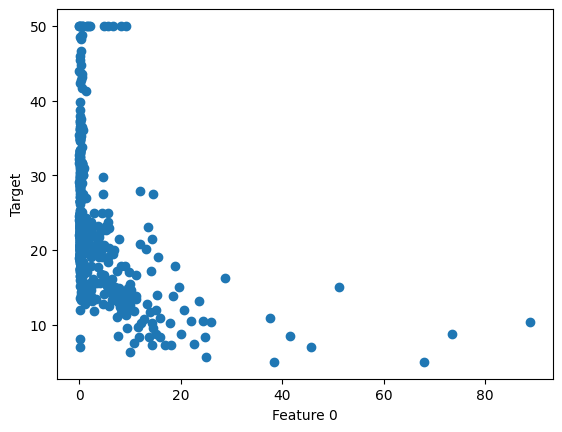

Plotando coluna 1


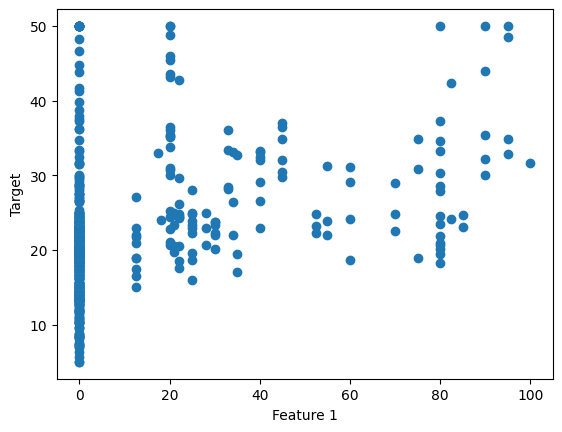

Plotando coluna 2


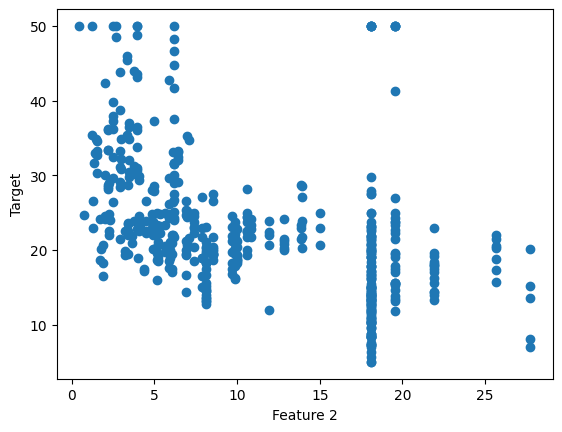

Plotando coluna 3


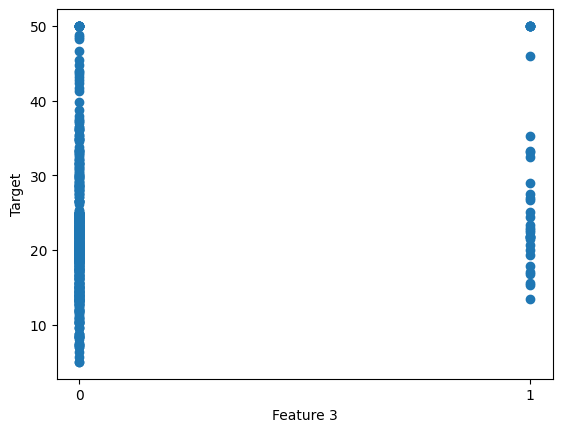

Plotando coluna 4


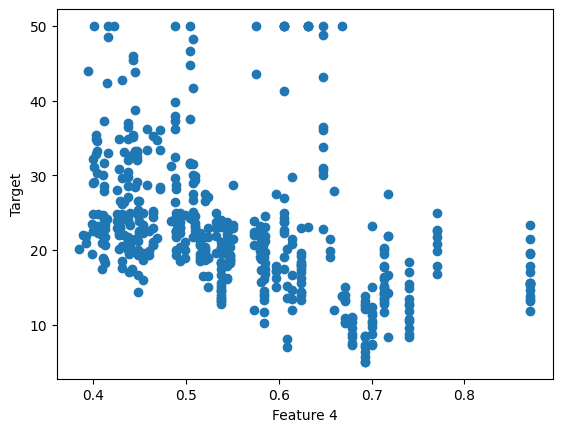

Plotando coluna 5


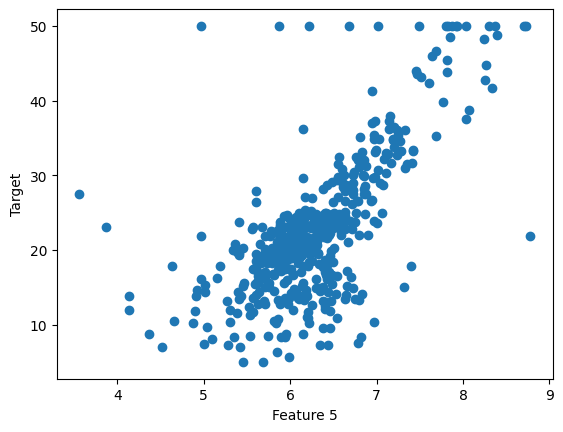

Plotando coluna 6


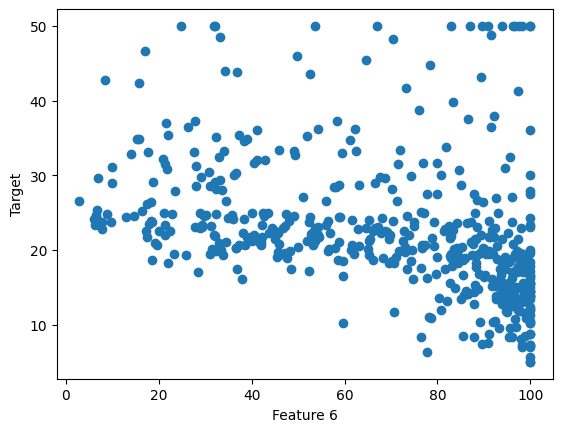

Plotando coluna 7


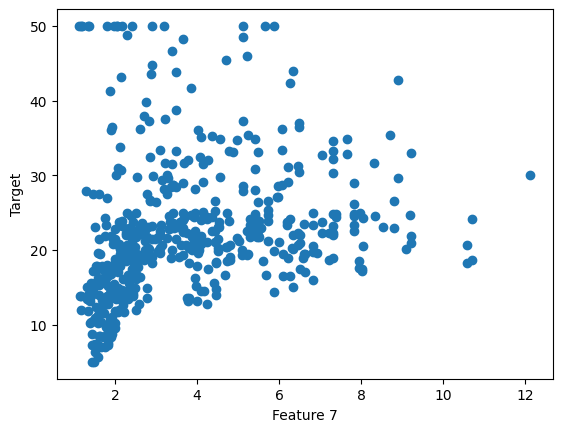

Plotando coluna 8


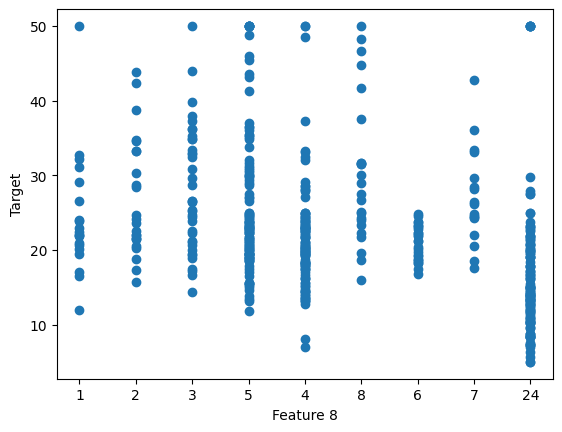

Plotando coluna 9


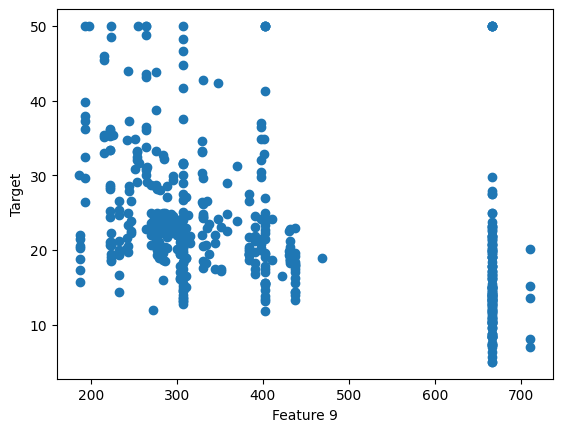

Plotando coluna 10


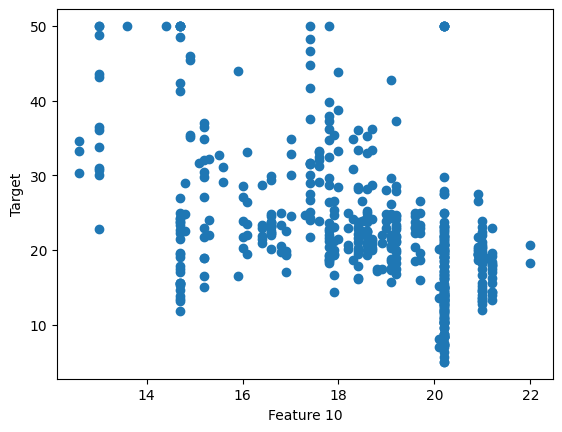

Plotando coluna 11


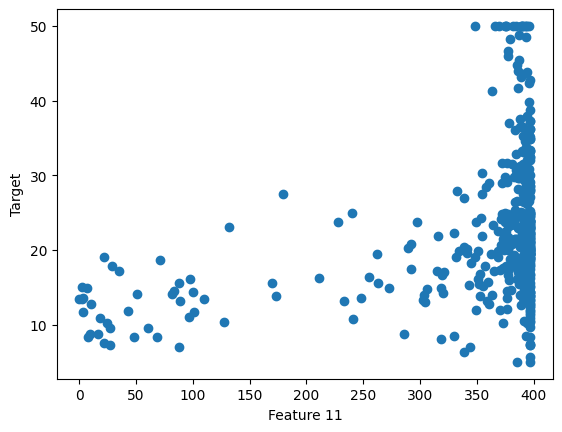

Plotando coluna 12


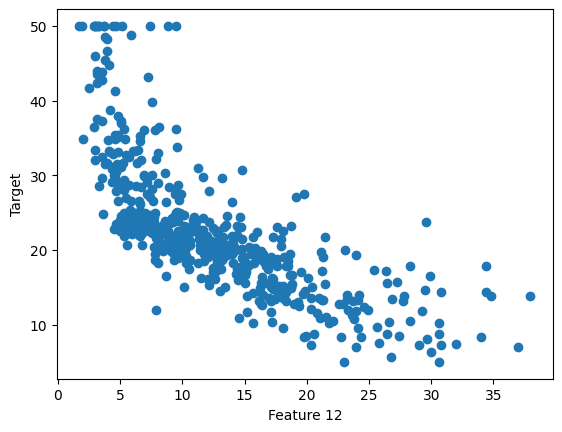

In [98]:
import matplotlib.pylab as plt
for i in range(X.shape[1]):  # Iterar sobre todas as colunas
    print(f"Plotando coluna {i}")
    plt.scatter(X.iloc[:, i], y)  # Usar iloc para acessar colunas
    plt.xlabel(f"Feature {i}")
    plt.ylabel("Target")
    plt.show()

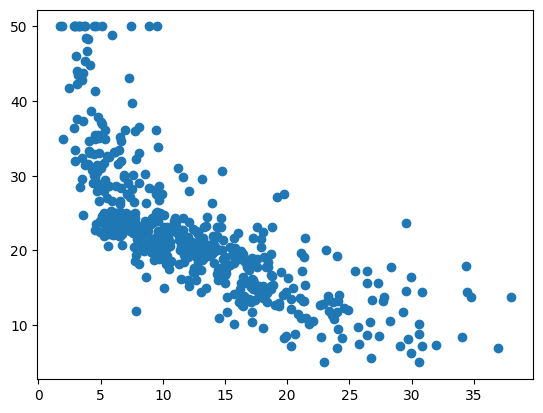

In [99]:
X12 = X.iloc[:,12:13]
plt.scatter(X12, y)

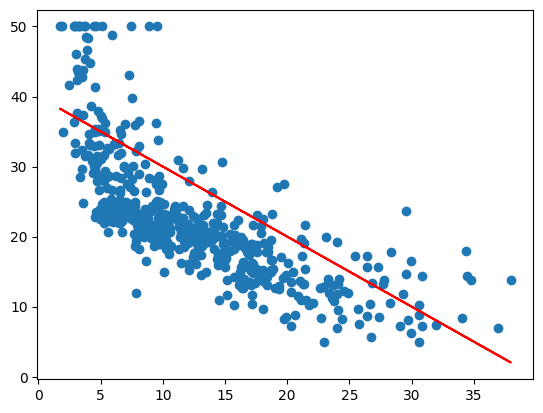

In [100]:
def modelo_linear(X, a, b):
    y = a*X + b 
    return y

ypred = modelo_linear(X12, -1, 40)
plt.scatter(X12, y)
plt.plot(X12, ypred, 'r')
plt.show()

In [101]:
import numpy as np

def mae(y, ypred):
    y_array = y.to_numpy().flatten() 
    ypred_array = ypred.to_numpy().flatten() 
    
    yDiff = ypred_array - y_array
    yAbs = np.abs(yDiff)
    
    mae = np.mean(yAbs)
    return mae

ypred = modelo_linear(X12, -1, 40) 
resultado_mae = mae(y, ypred)
print(f"Mean Absolute Error (MAE): {resultado_mae}")


Mean Absolute Error (MAE): 6.9654743083003945


In [102]:
def mse(y, ypred):
    y_array = y.to_numpy().flatten()
    ypred_array = ypred.to_numpy().flatten() 
    
    # Calcular o erro ao quadrado
    squared_diff = (ypred_array - y_array) ** 2
    
    # Calcular o MSE como a média dos erros ao quadrado
    mse = np.mean(squared_diff)
    return mse

# Exemplo de uso
ypred = modelo_linear(X12, -1, 40)  # Certifique-se que esta função retorna algo compatível
resultado_mse = mse(y, ypred)
print(f"Mean Squared Error (MSE): {resultado_mse}")


Mean Squared Error (MSE): 61.78580296442688


In [103]:
def rmse(y, ypred):
    y_array = y.to_numpy().flatten() 
    ypred_array = ypred.to_numpy().flatten()  
    
    squared_diff = (ypred_array - y_array) ** 2
    
    mse = np.mean(squared_diff)
    
    rmse = np.sqrt(mse)
    return rmse

# Exemplo de uso
ypred = modelo_linear(X12, -1, 40)  # Certifique-se que esta função retorna algo compatível
resultado_rmse = rmse(y, ypred)
print(f"Root Mean Squared Error (RMSE): {resultado_rmse}")

Root Mean Squared Error (RMSE): 7.860394580708203


In [104]:
from sklearn.metrics import mean_squared_error
from math import sqrt

def rmse(y, ypred):
    mse = mean_squared_error(y, ypred)
    return sqrt(mse)
ypred = modelo_linear(X12, -1, 40)
rmse(y, ypred)


7.860394580708203

24.334069059572577
6.20346413306178


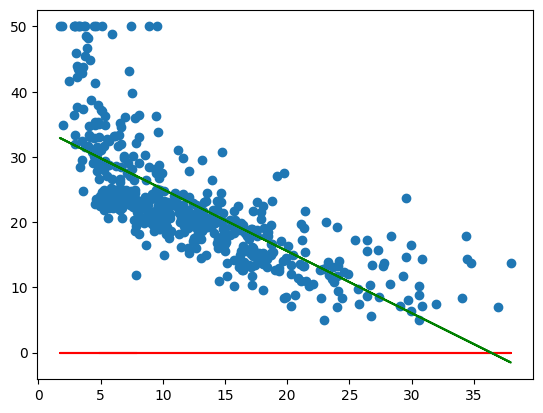

(np.float64(-0.9500317226790728), np.float64(34.55355094057261))

In [127]:
class regressao_linear():
    def __init__(self):
        self.a = 0
        self.b = 0
    def fit(self, X, y):
        for _ in range(500):
            ypred = self.predict(X)
            erro = ypred - y.values.reshape(-1,1)
            ajusteB = (sum(erro.to_numpy())/len(erro))
            self.b = self.b - 0.1*ajusteB[0]
            
            ajusteA = sum([erro.to_numpy()[i]*X.values[i] for i in range(X.shape[0])])/sum(X.values)
            self.a = self.a - 0.1*ajusteA[0]
            
    def predict(self, X):
        y = self.a*X + self.b
        return y
    
plt.scatter(X12, y)
modelo = regressao_linear()
ypred=modelo.predict(X12)
print(rmse(y, ypred))
plt.plot(X12, ypred, 'r')

modelo.fit(X12, y)

ypred=modelo.predict(X12)
print(rmse(y, ypred))
plt.plot(X12, ypred, 'g')

plt.show()
modelo.a, modelo.b

## Com notação vetorial


In [129]:
class regressao_linear():
    def __init__(self):
        self.w = np.zeros((2,1))
    @staticmethod
    def addBias(X):
        bias = np.ones((X.shape[0], 1))
        X_b = np.concatenate((bias,X), axis=1)
        return X_b
    def fit(self, X, y):
        X_b = self.addBias(X)
        for _ in range(500):
            ypred = self.predict(X)
            erro = ypred - y.values.reshape(-1,1)
            ajuste = X_b.T.dot(erro)/sum(X_b).reshape(-1,1)
            self.w = self.w - 0.1*ajuste
            
    def predict(self, X):
        X_b = self.addBias(X)
        y = X_b.dot(self.w)
        return y

24.334069059572577
6.20346413306178


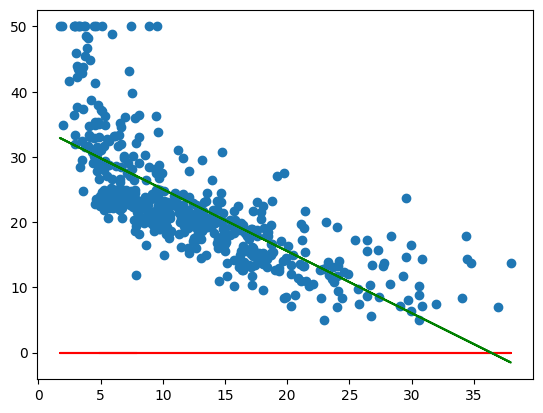

array([[34.55355094],
       [-0.95003172]])

In [107]:
plt.scatter(X12, y)
modelo = regressao_linear()
ypred=modelo.predict(X12)
print(rmse(y, ypred))
plt.plot(X12, ypred, 'r')

modelo.fit(X12, y)

ypred=modelo.predict(X12)
print(rmse(y, ypred))
plt.plot(X12, ypred, 'g')

plt.show()
modelo.w

## Análise do Erro

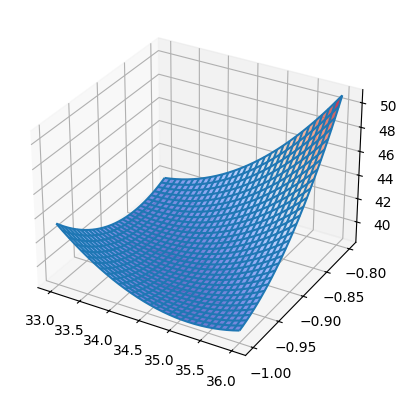

In [108]:
import numpy as np
w0 = np.linspace(33,36,30)
w1 = np.linspace(-1,-0.8,30)

def z_function(W0, W1):
    modelo = regressao_linear()
    Erro = np.empty(W0.shape)
    for j in range(Erro.shape[0]):
        for k in range(Erro.shape[1]):
            modelo.w[0] = W0[j][k]
            modelo.w[1] = W1[j][k]
            ypred = modelo.predict(X12)
            mse = mean_squared_error(y, ypred)
            Erro[j][k] = mse
    return Erro
        

ax = plt.axes(projection="3d")
W0, W1 = np.meshgrid(w0, w1)
Erro = z_function(W0, W1)

ax.plot_wireframe(W0, W1, Erro)
ax.plot_surface(W0, W1, Erro, rstride=1, cstride=1, alpha=0.75, cmap='coolwarm', edgecolor='none')

plt.show()



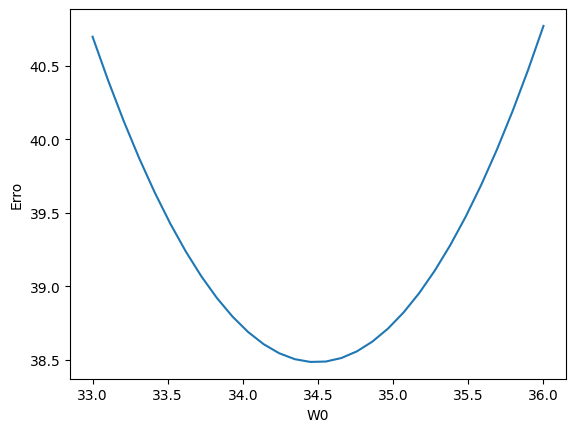

In [109]:
plt.ylabel("Erro")
plt.xlabel("W0")
i = 8
plt.plot(W0[i,:],Erro[i,:])
plt.show()

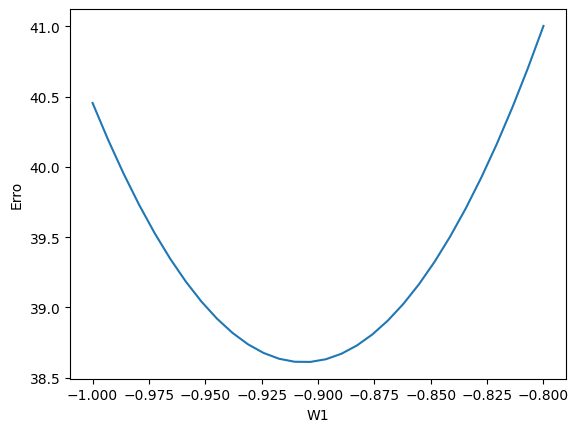

In [110]:
plt.ylabel("Erro")
plt.xlabel("W1")
i = 8
plt.plot(W1[:,i],Erro[:,i])
plt.show()

## Alterando o modelo de predição

In [118]:
class regressao_linear():
    def __init__(self):
        self.w = np.zeros((2,1))
        self.wh = []
    @staticmethod
    def addBias(X):
        bias = np.ones((X.shape[0], 1))
        X_b = np.concatenate((bias,X), axis=1)
        return X_b
    def fit(self, X, y):
        X_b = self.addBias(X)
        for _ in range(20):
            ypred = self.predict(X)
            erro = ypred - y.values.reshape(-1,1)
            ajuste = X_b.T.dot(erro)/sum(X_b).reshape(-1,1)
            self.w = self.w - 0.1*ajuste
            ypred = self.predict(X)
            mse = mean_squared_error(y, ypred)
            self.wh.append([self.w[0,0], self.w[1,0], mse])
            
    def predict(self, X):
        X_b = self.addBias(X)
        y = X_b.dot(self.w)
        return y

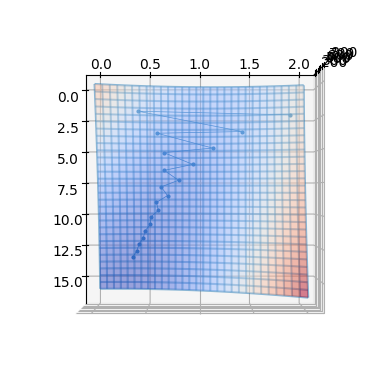

In [121]:
w0 = np.linspace(0,16,30)
w1 = np.linspace(0,2,30)

def z_function(W0, W1):
    modelo = regressao_linear()
    Erro = np.empty(W0.shape)
    for j in range(Erro.shape[0]):
        for k in range(Erro.shape[1]):
            modelo.w[0] = W0[j][k]
            modelo.w[1] = W1[j][k]
            ypred = modelo.predict(X12)
            mse = mean_squared_error(y, ypred)
            Erro[j][k] = mse
    return Erro
        

ax = plt.axes(projection="3d")
W0, W1 = np.meshgrid(w0, w1)
Erro = z_function(W0, W1)

ax.plot_wireframe(W0, W1, Erro, alpha=0.5)
ax.plot_surface(W0, W1, Erro, rstride=1, cstride=1, alpha=0.5, cmap='coolwarm', edgecolor='none')

modelo = regressao_linear()
modelo.fit(X12, y)
ypred = modelo.predict(X12)
wh = np.array(modelo.wh)

ax.plot(wh[:,0], wh[:,1], wh[:,2], marker='o', linewidth='0.5', markersize=2)
ax.view_init(azim=0, elev=90)

plt.show()

## Resumindo, sem o SciKit Learn

In [130]:
modelo = regressao_linear()
modelo.fit(X12, y)
ypred = modelo.predict(X12)
print(mean_squared_error(y, ypred))
print(modelo.w)

38.48296725018394
[[34.55355094]
 [-0.95003172]]


## Usando o SciKit Learn

In [135]:
from sklearn.linear_model import LinearRegression

modelo = LinearRegression()
modelo.fit(X12, y)
ypred = modelo.predict(X12)
print(mean_squared_error(y, ypred))
print(modelo.intercept_, modelo.coef_)

38.48296722989415
34.5538408793831 [-0.95004935]


## Modelo Multivariado

In [137]:
from sklearn.linear_model import LinearRegression

modelo = LinearRegression()
modelo.fit(X, y)
ypred = modelo.predict(X.values)
print(mean_squared_error(y, ypred))
print(modelo.intercept_, modelo.coef_)

21.894831181729202
36.45948838509003 [-1.08011358e-01  4.64204584e-02  2.05586264e-02  2.68673382e+00
 -1.77666112e+01  3.80986521e+00  6.92224640e-04 -1.47556685e+00
  3.06049479e-01 -1.23345939e-02 -9.52747232e-01  9.31168327e-03
 -5.24758378e-01]


/Users/otaviolube/Desktop/pos-devai-ifes/int-art-apr-maq/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
